# PROJECT 3A_RTS: Big data analysis of an electricity power consumption (Tetouan Town - Morocco) and visualizing Prediction results

## 1) Import useful libraries¶

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


## 2) Retrieve the dataset

In [154]:
consumptionTetuan=pd.read_csv("Tetuan City power consumption.csv")

In [155]:
zone1 = consumptionTetuan['Zone 1 Power Consumption']
zone2 = consumptionTetuan['Zone 2  Power Consumption'] 
zone3 = consumptionTetuan['Zone 3  Power Consumption']

## 3) Model of Decision Tree regressor

In [156]:
features=['Temperature', 'Humidity', 'Wind Speed', "general diffuse flows", "diffuse flows"]
X = consumptionTetuan[features]
y = zone1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [157]:
print("Size of y_test:",y_test.shape)
print("Size of y_train:", y_train.shape)

Size of y_test: (10484,)
Size of y_train: (41932,)


In [158]:
model1 = DecisionTreeRegressor(random_state=1)

model1.fit(X_train, y_train)
print(model1.score(X_train, y_train))
predictions= model1.predict(X_test)

1.0


In [159]:
predictions

array([24654.83444, 31517.34219, 34068.44639, ..., 39218.36066,
       30542.2605 , 21231.93916])

In [160]:
print("MAE =", mean_absolute_error(y_test, predictions))

MAE = 3919.0991468513935


In [161]:
features=['Temperature', 'Humidity', 'Wind Speed', "general diffuse flows", "diffuse flows"]
X = consumptionTetuan[features]
y = zone2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [162]:
model2 = DecisionTreeRegressor(random_state=1)

model2.fit(X_train, y_train)
predictions= model2.predict(X_test)
print("MAE =", mean_absolute_error(y_test, predictions))

MAE = 2972.901600010206


In [126]:
features=['Temperature', 'Humidity', 'Wind Speed', "general diffuse flows", "diffuse flows"]
X = consumptionTetuan[features]
y = zone3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [127]:
model3 = DecisionTreeRegressor(random_state=1)

model3.fit(X_train, y_train)
predictions= model3.predict(X_test)
print("MAE =",mean_absolute_error(y_test, predictions))

MAE = 2975.9682465205074


In [128]:
# avec heure
consumptionTetuan['DateTime']=pd.to_datetime(consumptionTetuan['DateTime']) 
def conv(data):
    data['month']=data['DateTime'].dt.month
    data['day']=data['DateTime'].dt.day
    data['hour']=data['DateTime'].dt.hour    
    return data

consumptionTetuan = conv(consumptionTetuan)

In [129]:
consumptionTetuan.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,month,day,hour
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,1,0
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,1,0
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,1,0
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,1,0
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,1,0


In [130]:
features=['Temperature', 'Humidity', 'Wind Speed', "general diffuse flows", "diffuse flows", "hour"]
X = consumptionTetuan[features]
y = zone1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [131]:
model1_Hours = DecisionTreeRegressor(random_state=1)

model1_Hours.fit(X_train, y_train)
predictions= model1_Hours.predict(X_test)

In [132]:
print("MAE =", mean_absolute_error(y_test, predictions))

MAE = 1496.25698768409


In [133]:
features=['Temperature', 'Humidity', 'Wind Speed', "general diffuse flows", "diffuse flows", "hour"]
X = consumptionTetuan[features]
y = zone2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [134]:
model2_Hours = DecisionTreeRegressor(random_state=1)

model2_Hours.fit(X_train, y_train)
predictions= model2_Hours.predict(X_test)
print("MAE =", mean_absolute_error(y_test, predictions))

MAE = 1455.320868540252


In [135]:
features=['Temperature', 'Humidity', 'Wind Speed', "general diffuse flows", "diffuse flows", "hour"]
X = consumptionTetuan[features]
y = zone3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [136]:
model3_Hours = DecisionTreeRegressor(random_state=1)

model3_Hours.fit(X_train, y_train)
predictions= model3_Hours.predict(X_test)
print(mean_absolute_error(y_test, predictions))

1567.7385081038726


In [137]:
X_test['Zone 3 Power Consumption'] = y_test

In [138]:
X_test

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,hour,Zone 3 Power Consumption
25500,20.46,89.70,4.916,0.055,0.141,2,21184.98462
40040,20.59,68.96,4.920,0.077,0.115,1,13375.80547
35066,27.01,46.78,4.922,784.000,66.450,12,13967.55873
27275,25.00,61.83,4.909,598.400,99.700,9,23612.38494
3329,9.85,70.80,0.083,0.051,0.115,2,14550.36145
...,...,...,...,...,...,...,...
9269,12.77,74.90,0.087,113.900,107.800,8,12240.00000
33689,21.55,53.88,4.926,0.095,0.063,22,29781.06583
21133,21.55,72.30,4.921,328.400,323.500,18,20276.59919
40112,25.02,44.41,4.920,449.700,206.500,13,13048.99696


In [139]:
X_test['Zone 3 Power predictions'] = predictions

In [140]:
X_test

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,hour,Zone 3 Power Consumption,Zone 3 Power predictions
25500,20.46,89.70,4.916,0.055,0.141,2,21184.98462,21013.66154
40040,20.59,68.96,4.920,0.077,0.115,1,13375.80547,13820.46987
35066,27.01,46.78,4.922,784.000,66.450,12,13967.55873,13568.38906
27275,25.00,61.83,4.909,598.400,99.700,9,23612.38494,23383.43096
3329,9.85,70.80,0.083,0.051,0.115,2,14550.36145,15487.22892
...,...,...,...,...,...,...,...,...
9269,12.77,74.90,0.087,113.900,107.800,8,12240.00000,11716.82412
33689,21.55,53.88,4.926,0.095,0.063,22,29781.06583,23040.00000
21133,21.55,72.30,4.921,328.400,323.500,18,20276.59919,17484.04858
40112,25.02,44.41,4.920,449.700,206.500,13,13048.99696,17943.27273


Text(0.5, 1.0, 'Consommation de la zone 3 et la prediction du modèle')

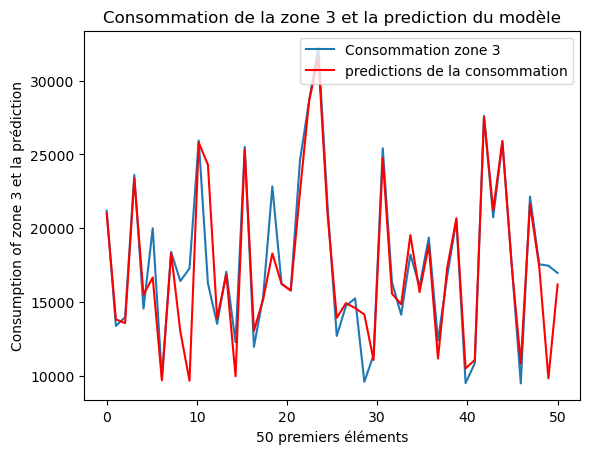

In [141]:
x = np.linspace(0,50,50) # start, stop, nombre point

plt.plot(x,y_test[0:50], label='Consommation zone 3')
plt.plot(x, predictions[0:50], c='r', label='predictions de la consommation')
plt.xlabel("50 premiers éléments")
plt.ylabel("Consumption of zone 3 et la prédiction")
plt.legend()
plt.title("Consommation de la zone 3 et la prediction du modèle")

Text(0.5, 1.0, 'Consommation de la zone 3 et la prediction du modèle')

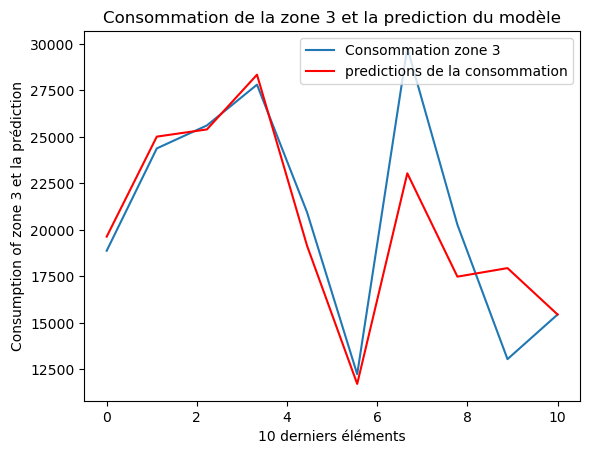

In [142]:
x = np.linspace(0,10,10)

plt.plot(x,y_test[(len(y_test)-10): (len(y_test))], label='Consommation zone 3')
plt.plot(x, predictions[(len(predictions)-10): (len(predictions))], c='r', label='predictions de la consommation')
plt.xlabel("10 derniers éléments")
plt.ylabel("Consumption of zone 3 et la prédiction")
plt.legend()
plt.title("Consommation de la zone 3 et la prediction du modèle")

In [143]:
predictions[len(predictions)-10:len(predictions)]

array([19636.1005 , 25012.36364, 25399.51807, 28340.36364, 19138.25126,
       11716.82412, 23040.     , 17484.04858, 17943.27273, 15446.74699])

In [144]:
y_test[(len(y_test)-10): (len(y_test))]

7131     18877.74874
13239    24378.18182
1262     25613.49398
14518    27805.09091
5755     20938.61307
9269     12240.00000
33689    29781.06583
21133    20276.59919
40112    13048.99696
7206     15450.69347
Name: Zone 3  Power Consumption, dtype: float64

In [145]:
abs(y_test[(len(y_test)-10):(len(y_test))]-predictions[len(predictions)-10:len(predictions)])

7131      758.35176
13239     634.18182
1262      213.97591
14518     535.27273
5755     1800.36181
9269      523.17588
33689    6741.06583
21133    2792.55061
40112    4894.27577
7206        3.94648
Name: Zone 3  Power Consumption, dtype: float64

In [146]:
features=['Temperature', 'Humidity', 'Wind Speed', "general diffuse flows", "diffuse flows"]
X = consumptionTetuan[features]
consumption = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
y = consumptionTetuan[consumption]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [147]:
model = DecisionTreeRegressor(random_state=1)

model.fit(X_train, y_train)
print(model.score(X_train, y_train))
predictions= model.predict(X_test)
print("MAE =", mean_absolute_error(y_test, predictions))

1.0
MAE = 3287.8623964001067


In [148]:
predictions

array([[24699.33775, 15350.51975, 19247.26154],
       [24804.43951, 15627.87751, 14505.32915],
       [27646.72566, 15672.34927, 13896.95608],
       ...,
       [39936.     , 24434.67492, 21360.97166],
       [30542.2605 , 17607.73931, 17844.36364],
       [44155.91489, 26096.34146, 25838.70968]])

In [149]:
y_test

,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
25500,27782.78146,17191.68399,21184.98462
40040,26386.34573,17887.96680,13375.80547
35066,27506.54867,15537.62994,13967.55873
27275,30388.30565,18672.15190,23612.38494
3329,22517.46835,13984.19453,14550.36145
...,...,...,...
9269,28456.85106,17315.85366,12240.00000
33689,42410.47725,28914.04435,29781.06583
21133,38639.21311,23650.77399,20276.59919
40112,36790.89716,22753.94191,13048.99696


In [150]:
X_test['index']= range(1,10485)

X_test['Zone 1'] = y_test["Zone 1 Power Consumption"]
X_test['Zone 1 predictions'] = predictions[:,0]


X_test['Zone 2'] = y_test["Zone 2  Power Consumption"]
X_test['Zone 2 predictions'] = predictions[:,1]

X_test['Zone 3'] = y_test["Zone 3  Power Consumption"]
X_test['Zone 3 predictions'] = predictions[:,2]


In [151]:
X_test

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,index,Zone 1,Zone 1 predictions,Zone 2,Zone 2 predictions,Zone 3,Zone 3 predictions
25500,20.46,89.70,4.916,0.055,0.141,1,27782.78146,24699.33775,17191.68399,15350.51975,21184.98462,19247.26154
40040,20.59,68.96,4.920,0.077,0.115,2,26386.34573,24804.43951,17887.96680,15627.87751,13375.80547,14505.32915
35066,27.01,46.78,4.922,784.000,66.450,3,27506.54867,27646.72566,15537.62994,15672.34927,13967.55873,13896.95608
27275,25.00,61.83,4.909,598.400,99.700,4,30388.30565,30943.25581,18672.15190,18869.62025,23612.38494,23979.91632
3329,9.85,70.80,0.083,0.051,0.115,5,22517.46835,23598.98734,13984.19453,14691.79331,14550.36145,15487.22892
...,...,...,...,...,...,...,...,...,...,...,...,...
9269,12.77,74.90,0.087,113.900,107.800,10480,28456.85106,28221.53846,17315.85366,22217.35537,12240.00000,14960.96386
33689,21.55,53.88,4.926,0.095,0.063,10481,42410.47725,43439.73363,28914.04435,29282.78775,29781.06583,30701.94357
21133,21.55,72.30,4.921,328.400,323.500,10482,38639.21311,39936.00000,23650.77399,24434.67492,20276.59919,21360.97166
40112,25.02,44.41,4.920,449.700,206.500,10483,36790.89716,30542.26050,22753.94191,17607.73931,13048.99696,17844.36364


In [152]:
#  Save it
import os
data_dir='Result'
# décommmenter la ligne si le fichier n'est pas créé
#os.makedirs(data_dir, mode=0o750, exist_ok=True)

filedata = 'Result/X_test.csv'


X_test.to_csv(filedata, sep=';', index=False)
size=os.path.getsize(filedata)/(1024*1024)
print(f'Dataset saved. ({size:0.1f} Mo)')


Dataset saved. (1.1 Mo)
